# Principal Component Analysis

PCA is a dimensionality reduction technique widely used in data analysis. It helps to simplify and reduce the number of dimensions required to understand a dataset when there are many numerical variables, into a smaller number of “Principal Components”.

It can be useful to help us understand our data, since thinking in more than three dimensions can be problematic.
With PCA, we can extract most of the information into only one or two variables constructed in a very specific way, such that they capture the most variance while having the added benefit of being uncorrelated among them by construction.


## Important!

Before you can use this this R code, load the **data_brexit_referendum_adjusted.csv** file from Blackboard. Read through "brexit example.R" for full details on how this file was generated.

In [1]:
data_file <- read.csv("data_brexit_referendum_adjusted.csv")

Principal Component Analysis (PCA) wrks best with numerical data so I'm checking that all data is now numeric first.

In [2]:
data_numeric_variables <- sapply(data_file, is.numeric)
# Print gives us a slightly better structure of output
print(data_numeric_variables)

                   X                   ID           RegionName 
                TRUE                 TRUE                FALSE 
              NVotes                Leave            Residents 
                TRUE                 TRUE                 TRUE 
          Households         AdultMeanAge                White 
                TRUE                 TRUE                 TRUE 
               Owned        OwnedOutright           SocialRent 
                TRUE                 TRUE                 TRUE 
         PrivateRent             Students                Unemp 
                TRUE                 TRUE                 TRUE 
        UnempRate_EA          HigherOccup              Density 
                TRUE                 TRUE                 TRUE 
            Deprived          MultiDepriv           Proportion 
                TRUE                 TRUE                 TRUE 
                Vote           Age_18to44         Age_45_above 
               FALSE                 TRU

In the earlier lecture I created a **Proportion** variable using the variables **NVotes** and **Leave**. Both these variables are correlated with **Proportion** and will produce false relationships in PCA. Now I'll remove these from the list of variables that I'm going to use for PCA.


In [3]:
data_numeric_variables["NVotes"] <- FALSE
data_numeric_variables["Leave"] <- FALSE

Now I'll remove all non-numeric data and the other 2 variables.

In [4]:
data_file_adjusted <- data_file[, data_numeric_variables]

Passing this numeric data (23 variables) into the `prcomp()` function and setting two arguments, center and scale, to be TRUE. Then we can have a peek at the PCA object with the `summary()` function.

When we print the `pca` object, we can see the standard deviations for each variable, but more importantly, we can see the weights used for each variable to create each principal component. 

As we can see, when we look at the full output in our computer, among the most important weights (the largest absolute values) we have the **age** and **ethnicity** variables, as well as others, such as **home ownership**.

In [5]:
pca <- prcomp(data_file_adjusted, center = TRUE, scale. = TRUE)
pca

Standard deviations (1, .., p=23):
 [1] 3.043219e+00 2.428564e+00 1.433885e+00 1.295641e+00 1.145004e+00
 [6] 9.655583e-01 7.208175e-01 6.210257e-01 5.555435e-01 4.592016e-01
[11] 3.813017e-01 3.431258e-01 2.121864e-01 1.986457e-01 1.627968e-01
[16] 1.368723e-01 1.147383e-01 1.019804e-01 9.696109e-02 8.110279e-02
[21] 7.055998e-02 2.700286e-02 1.750784e-16

Rotation (n x k) = (23 x 23):
                              PC1          PC2          PC3          PC4
X                     0.008235001  0.008271937  0.664743650 -0.212267938
ID                    0.008235001  0.008271937  0.664743650 -0.212267938
Residents             0.193079164 -0.013686224  0.199496316  0.399426986
Households            0.172076168 -0.016303942  0.182956698  0.304773992
AdultMeanAge         -0.272635613 -0.182191801  0.023100560  0.103790101
White                -0.226444295 -0.100950791 -0.044684872 -0.385552477
Owned                -0.287968997 -0.076234500  0.096149903  0.251957178
OwnedOutright        -0.26

Lets have a look at the summary of the pca components.

In [6]:
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4    PC5     PC6     PC7
Standard deviation     3.0432 2.4286 1.43389 1.29564 1.1450 0.96556 0.72082
Proportion of Variance 0.4027 0.2564 0.08939 0.07299 0.0570 0.04053 0.02259
Cumulative Proportion  0.4027 0.6591 0.74848 0.82147 0.8785 0.91901 0.94160
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.62103 0.55554 0.45920 0.38130 0.34313 0.21219 0.19865
Proportion of Variance 0.01677 0.01342 0.00917 0.00632 0.00512 0.00196 0.00172
Cumulative Proportion  0.95837 0.97178 0.98095 0.98727 0.99239 0.99435 0.99607
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.16280 0.13687 0.11474 0.10198 0.09696 0.08110 0.07056
Proportion of Variance 0.00115 0.00081 0.00057 0.00045 0.00041 0.00029 0.00022
Cumulative Proportion  0.99722 0.99803 0.99860 0.99906 0.99947 0.99975 0.99997
                          PC22      PC

We obtain 23 principal components, which are called PC1-23. Each of these explains a percentage of the total variation in the dataset. That is to say: **PC1** explains **44%** of the total variance, which means that nearly half of the information in the dataset (23 variables) can be encapsulated by just that one Principal Component. 

**PC2** explains **22%** of the variance. So, by knowing the position of a sample in relation to just PC1 and PC2, you can get a very accurate view on where it stands in relation to other samples, as just PC1 and PC2 can explain 66% of the variance.

The **Cumulative Proportion** value shows how each subsequent principal component adds to the amount of total variance captured by eac pca. For example, the cumulative proportion of 0.75232 for PC3 means that up to 0.75232% of the dat can be explained by just these 3 PCs.

We can look at the "cumulative proportion" line to see this value across all variables eg PC1-3 = 75% of data.

The rotation measure provides the principal component loading. Each column of rotation matrix contains the principal component loading vector. This is the most important measure we should be interested in and is the exact measure of a variable in a component.

In this example I'm showing all vector and the first 4 principal components.

In [7]:
pca$rotation[1:nrow(pca$rotation), 1:4]

,PC1,PC2,PC3,PC4
X,0.008235001,0.008271937,0.664743650,-0.212267938
ID,0.008235001,0.008271937,0.664743650,-0.212267938
Residents,0.193079164,-0.013686224,0.199496316,0.399426986
Households,0.172076168,-0.016303942,0.182956698,0.304773992
AdultMeanAge,-0.272635613,-0.182191801,0.023100560,0.103790101
White,-0.226444295,-0.100950791,-0.044684872,-0.385552477
Owned,-0.287968997,-0.076234500,0.096149903,0.251957178
OwnedOutright,-0.265431971,-0.046400632,0.093474306,0.301828280
SocialRent,0.225030077,-0.107493564,-0.122514450,-0.300687491
PrivateRent,0.196480763,0.257189783,-0.009905040,-0.057139251


It appears that Unemp, UnempRate_EA, Deprived, Age_18to44 infer the first principal component.

And PrivateRent, HigherOccup, MultiDepriv, Age_18to44, High_education_level infer the second principal component.

We can view the variances (in the form of squared standard deviations) from the `summary(pca)` results. We can see how each subsequent principal
component captures a lower amount of the total variance:

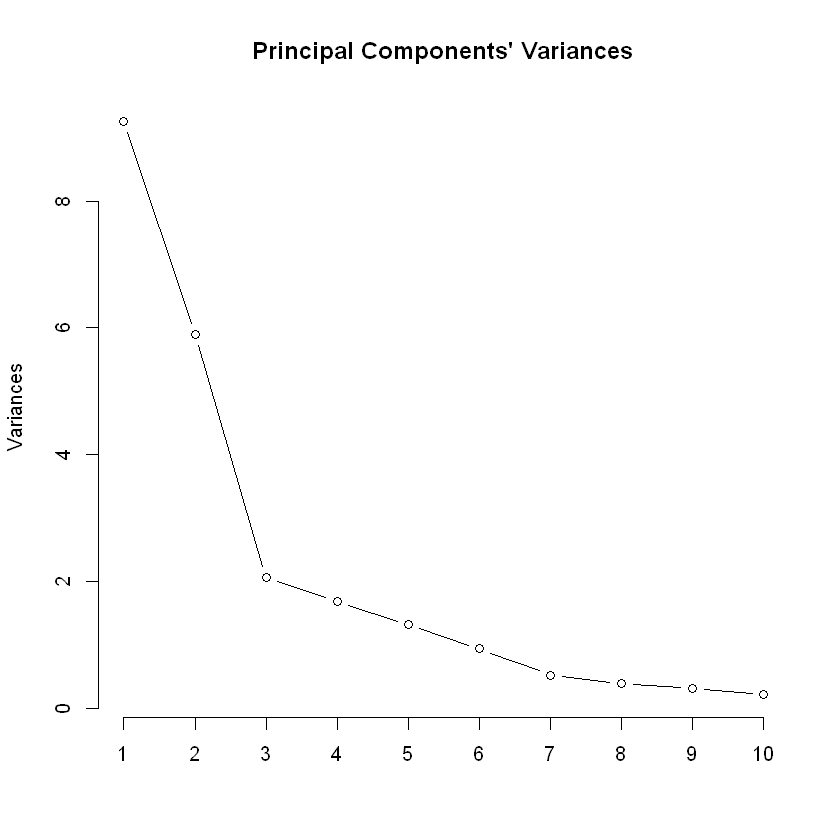

In [8]:
plot(pca, type = "l", main = "Principal Components' Variances")

This plot shows the variamces in squared standard deviations from the summary() results. We can see how each subsequent principal component captures a lower amount of total variance.

Let's call `str()` to have a look at our PCA object. 

We can view the following information:<br>
`$center` - The center point <br>
`$scale` - scaling <br>
`sdev` - standard deviation of each principal component <br>
`$rotation` - The relationship (correlation or anticorrelation, etc) between the initial variables and the principal components. See values above. <br>

`$(x)` shows the values of each sample in terms of the principal components.

In [9]:
str(pca)

List of 5
 $ sdev    : num [1:23] 3.04 2.43 1.43 1.3 1.15 ...
 $ rotation: num [1:23, 1:23] 0.00824 0.00824 0.19308 0.17208 -0.27264 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:23] "X" "ID" "Residents" "Households" ...
  .. ..$ : chr [1:23] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:23] 402 402 11739 4793.4 46.8 ...
  ..- attr(*, "names")= chr [1:23] "X" "ID" "Residents" "Households" ...
 $ scale   : Named num [1:23] 231.95 231.95 5167.09 2041.61 4.21 ...
  ..- attr(*, "names")= chr [1:23] "X" "ID" "Residents" "Households" ...
 $ x       : num [1:803, 1:23] 7.404 6.977 0.892 0.81 0.209 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:23] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


## PCA plots

We will make a biplot, which includes both the position of each sample in terms of PC1 and PC2 and also will show you how the initial variables map onto this. 

Since these two principal components are formed as linear combinations of the original variables, we need some guidance when interpreting them. To make it easy, the arrows point towards the direction of that variable's association to the principal component axis. The further the arrow is from the centre, the stronger the effect on the principal components.

We will use the `ggbiplot` package, which offers a user-friendly and pretty function to plot biplots. A biplot is a type of plot that will allow you to visualise how the samples relate to one another in our PCA (which samples are similar and which are different) and will simultaneously reveal how each variable contributes to each principal component.

See See https://www.rdocumentation.org/packages/ggbiplot/versions/0.55 for further information.

In [10]:
# Install this library before accessing relevant commands to install
# ggbiplot from github
# Choose "1" to install all packages

#install.packages("devtools")

If you get the following error then install the `backports` package.

*Error: package or namespace load failed for 'devtools':
 .onLoad failed in loadNamespace() for 'pkgload', details:
  call: loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]])
  error: there is no package called 'backports'*
 

In [13]:
install.packages("backports")

Installing package into 'C:/Users/james.connolly/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'backports' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'backports'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\james.connolly\Documents\R\win-library\3.6\00LOCK\backports\libs\x64\backports.dll to C:\Users\james.connolly\Documents\R\win-library\3.6\backports\libs\x64\backports.dll: Permission denied"
Warning message:
"restored 'backports'"



The downloaded binary packages are in
	C:\Users\james.connolly\AppData\Local\Temp\RtmpkRmttb\downloaded_packages


In [11]:
library(devtools)


Warning message:
"package 'devtools' was built under R version 3.6.3"
Loading required package: usethis

Warning message:
"package 'usethis' was built under R version 3.6.3"


In [12]:
# You must have R version 3.6.3 for this to work
#install_github("vqv/ggbiplot")
library(ggbiplot)

Warning message:
"package 'ggbiplot' was built under R version 3.6.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: plyr

Warning message:
"package 'plyr' was built under R version 3.6.3"
Loading required package: scales

Warning message:
"package 'scales' was built under R version 3.6.3"
Loading required package: grid



We could show additional data on the `ggbiplot` by using the option `labels = ` command. For example, if we wanted to show the proportion value at each point on the plot, we could use the command `labels=data_file$Proportion`.

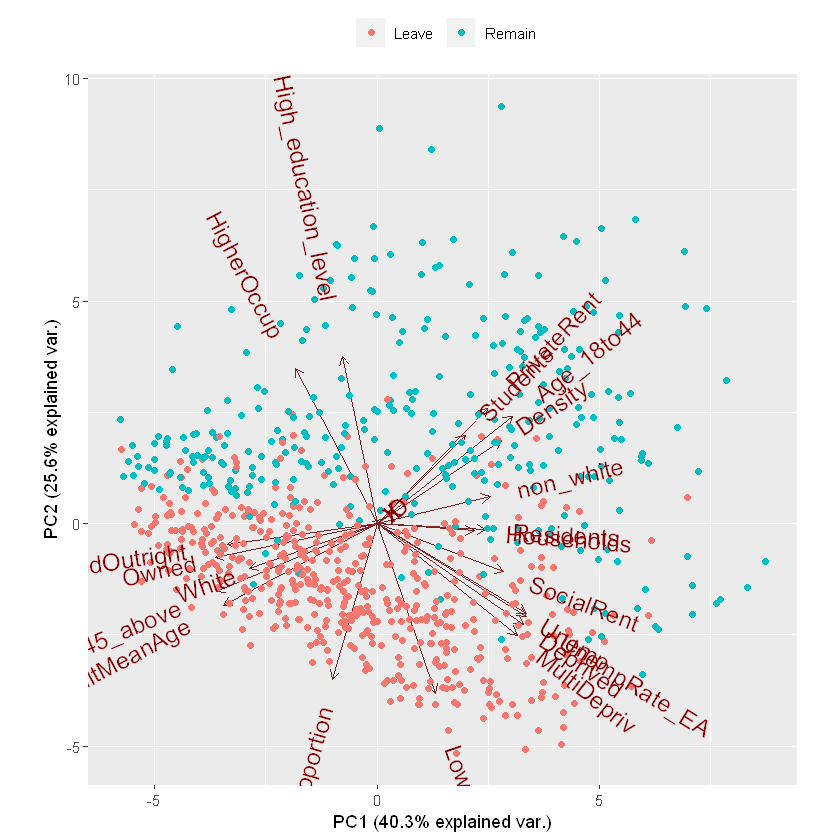

In [13]:
biplot <- ggbiplot(pca, groups = data_file$Vote,
         obs.scale = 1,
         var.scale = 1,
         varname.size = 5
         )
biplot <- biplot + scale_color_discrete(name = "")

biplot <- biplot + theme(legend.position = "top", 
                         legend.direction = "horizontal")


#biplot <- biplot + xlim(-10, 10) + ylim(-10, 10)
print(biplot)

The axes are seen as arrows originating from the centre point.

Here, we see that the variables **Proportion** is strongly related to the wards that voted to leave the EU, which is obvious since that's by construction. 

We can see soem variables that are similar to one another. `HigherOccup` and `High_education_level` are related. That's because `High_education_level` and `L4Quals_plus` should have a positive correlation, and this shows that both groups would prefer to remain in the E.U.

People with lower education would prefer to leave the E.U., as would older people.

However, we can also see some other interesting relations. For example, other than the effects we have found so far (age, education, and ethnicity), people owning their own homes is also slightly associated with a higher tendency towards voting to leave the EU. 

On the other side, a previously unknown relation is the fact that the more dense a ward's population is (think about highly populated
cities), the more likely it is that they will vote to remain in the EU.

**Age_18to44**, **Students**, **non_white**, **Density** all contribute to PC1, with higher values in those variables moving the samples to the right on this plot. 

Similarly, it can be said that the second component corresponds to a measure of 

We can zoom into a section of the plot.

Warning message:
"Removed 16 rows containing missing values (geom_segment)."
Warning message:
"Removed 639 rows containing missing values (geom_point)."
Warning message:
"Removed 16 rows containing missing values (geom_text)."


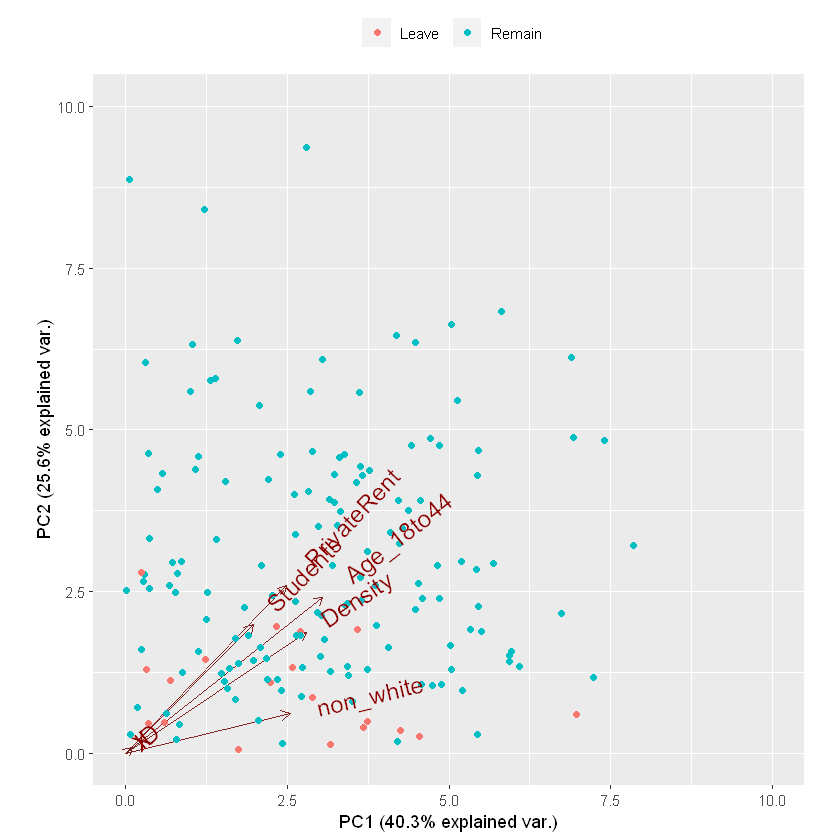

In [14]:
biplot <- ggbiplot(pca, groups = data_file$Vote,
         obs.scale = 1,
         var.scale = 1,
         varname.size = 5
         )
biplot <- biplot + scale_color_discrete(name = "")

biplot <- biplot + theme(legend.position = "top", legend.direction = "horizontal")


biplot <- biplot + xlim(0, 10) + ylim(0, 10)
print(biplot)

We can also categorise the data to see if further relatiosn exist.

In this example, I'm examining whether there's a relationship between the region name and voting. I'm using the `groups` argument to do this. And I'm setting the `ellipse` option to `TRUE` which will show an ellispe around each group.

In [15]:
opar <- par(no.readonly = TRUE)

In [16]:

par(
  mar      = c(10, 1, 10, 2),
  xaxs     = "i",
  yaxs     = "i",
  cex.axis = 20,
  cex.lab  = 20
)

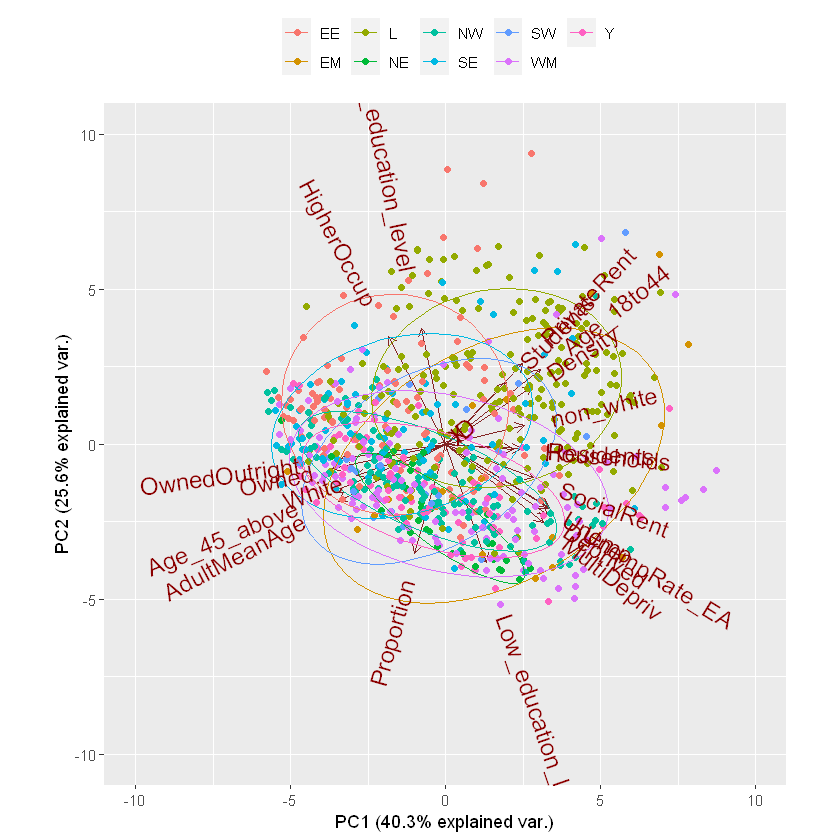

In [17]:
biplot <- ggbiplot(pca, 
                   groups = data_file$Region, 
                   obs.scale = 1,
                   var.scale = 1,
                   ellipse = TRUE,
                   varname.size = 5
         )
biplot <- biplot + scale_color_discrete(name = "")

biplot <- biplot + theme(legend.position = "top", legend.direction = "horizontal")


biplot <- biplot + xlim(-10, 10) + ylim(-10, 10)
print(biplot)

We can infer tha the first principal component corresponds to a measure of

We can use the same set of graphical parameters to alter the `biplot` as you would for any `ggplot`. Here I'm adding the title with ggtitle().



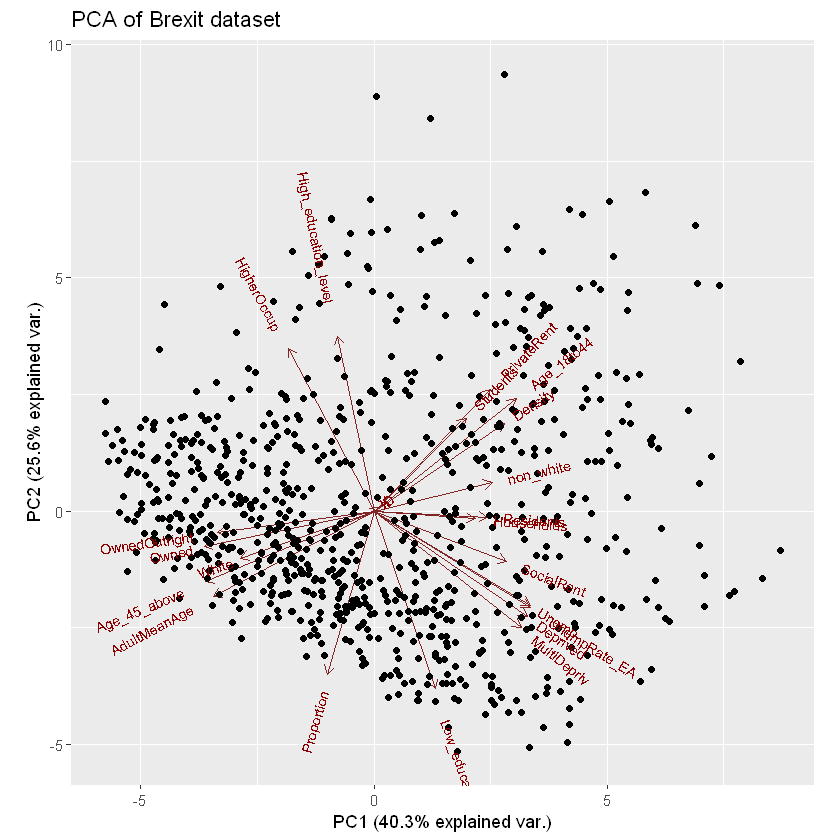

In [18]:
biplot <- ggbiplot(pca,
                   
                   obs.scale = 1,
                   var.scale = 1,
                   ellipse = TRUE)

biplot <- biplot + scale_color_discrete(name = "")

biplot <- biplot + theme(legend.position = "top", legend.direction = "horizontal")

biplot <- biplot + ggtitle("PCA of Brexit dataset") 

print(biplot)

Of course, we have many principal components available, each of which map differently to the original variables. We can also use ggbiplot to plot these other components, by using the `choices` argument.

Let's have a look at PC3 and PC4:

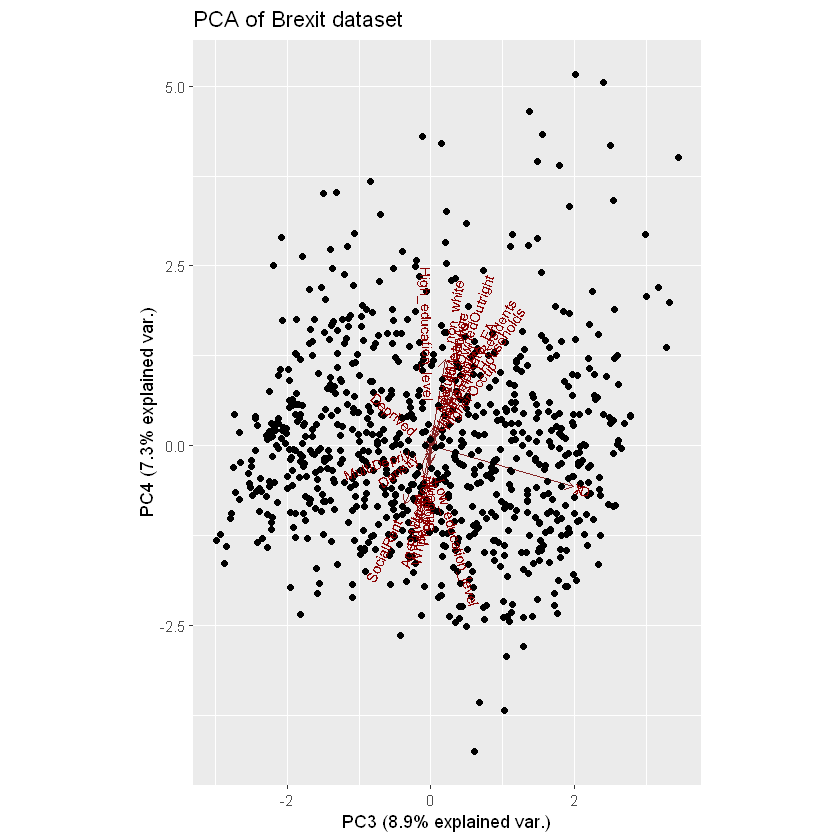

In [19]:
biplot <- ggbiplot(pca,
                   choices=c(3,4),
                   obs.scale = 1,
                   var.scale = 1,
                   
                   ellipse = TRUE)

biplot <- biplot + scale_color_discrete(name = "")

biplot <- biplot + theme(legend.position = "top", legend.direction = "horizontal")

biplot <- biplot + ggtitle("PCA of Brexit dataset") 

print(biplot)